<a href="https://colab.research.google.com/github/Vespidboss243/proyectoFinal-Preanalitica/blob/main/AutoMl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install tpot on the server
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=37a7f5662a6148634d6c2f8f9a547628e009ea08753db68407793fb1dad509b7
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [3]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Import the tpot Clasifier
from tpot import TPOTClassifier

In [4]:
X = pd.read_csv("X.csv")
X.head()

,Unnamed: 0,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.20,0.000,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.65,0.650,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.05,0.003,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,0.71,0.710,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.13,0.001,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [7]:
X=X.drop(columns=['Unnamed: 0'])

In [5]:
Y = pd.read_csv("Y.csv")
Y.head()

,Unnamed: 0,is_safe
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1


In [8]:
Y=Y.drop(columns=['Unnamed: 0'])

<Axes: xlabel='is_safe'>

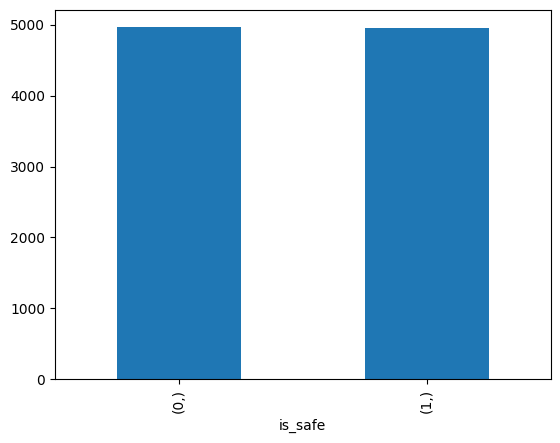

In [9]:
#División 70-30
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=1) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

In [11]:
# Create a tpot object with a few parameters
tpot = TPOTClassifier(scoring = 'recall', 
                    max_time_mins = 480, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)

In [12]:
# Fit the tpot model on the training data
tpot.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: SGDClassifier(BernoulliNB(input_matrix, alpha=0.1, fit_prior=False), alpha=0.01, eta0=0.1, fit_intercept=True, l1_ratio=0.75, learning_rate=invscaling, loss=modified_huber, penalty=elasticnet, power_t=10.0)


TPOTClassifier(max_time_mins=480, n_jobs=-1, scoring='recall', verbosity=2)

In [13]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=BernoulliNB(alpha=0.1,
                                                         fit_prior=False))),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.01, eta0=0.1, l1_ratio=0.75,
                               learning_rate='invscaling',
                               loss='modified_huber', penalty='elasticnet',
                               power_t=10.0))])


In [14]:
# Evaluate the final model
print(tpot.score(X_test, Y_test))

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
